<a href="https://colab.research.google.com/github/sofiapapadron/IME_IAA/blob/main/Laboratorio/Practica7_REDES_NEURONALES_CONVOLUCIONALES/prueba_cnn_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from keras.models import load_model
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [2]:

model = load_model('./mnist_cnn.h5')

In [3]:
def preprocess_image(img, thresh_val=127, iter_val=1):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh_img = cv2.threshold(gray, thresh_val, 255, cv2.THRESH_BINARY_INV)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    thresh_img = cv2.morphologyEx(thresh_img, cv2.MORPH_OPEN, kernel, iterations=iter_val)
    thresh_img = cv2.resize(thresh_img, (28, 28))
    thresh_img = np.reshape(thresh_img, (1, 28, 28, 1))
    return thresh_img

def get_prediction(img, model):
    prediction = model.predict(img)
    return np.argmax(prediction)

def show_image(img, pred_val):
    final_img = img.reshape((28, 28))
    final_img = cv2.resize(final_img, (224, 224))
    plt.imshow(final_img, cmap='gray')
    plt.title(f"Predicción: {pred_val}")
    plt.axis('off')
    plt.show()

In [21]:
from google.colab import files
uploaded = files.upload()

Saving 8.webp to 8.webp


In [22]:
image_path = next(iter(uploaded))
img = cv2.imread(image_path)

In [23]:
gray = preprocess_image(img)

In [24]:
prediction = get_prediction(gray, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


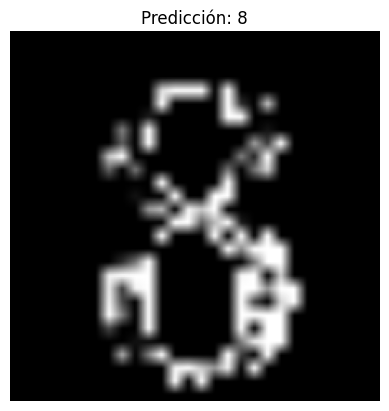

In [25]:
show_image(gray, prediction)